# Colon Cancer Drug Response Prediction

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [24]:
file_path = "raw_colon_cancer_data.csv"
df = pd.read_csv(file_path)
df.shape

(7643, 82)

In [25]:
df.head()

Patient_ID    Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6  \
0  Patient_1  3.745401  9.507143  7.319939  5.986585  1.560186  1.559945   
1  Patient_2  9.695846  7.751328  9.394989  8.948274  5.979000  9.218742   
2  Patient_3  0.314292  6.364104  3.143560  5.085707  9.075665  2.492922   
3  Patient_4  9.082659  2.395619  1.448949  4.894528  9.856505  2.420553   
4  Patient_5  6.420316  0.841400  1.616287  8.985542  6.064291  0.091971   

     Gene_7    Gene_8    Gene_9  ...  Pathway_2  Pathway_3  Pathway_4  \
0  0.580836  8.661761  6.011150  ...       High   Moderate   Moderate   
1  0.884925  1.959829  0.452273  ...        Low       High       High   
2  4.103829  7.555511  2.287982  ...        Low       High        Low   
3  6.721355  7.616196  2.376375  ...   Moderate       High        Low   
4  1.014715  6.635018  0.050616  ...        Low       High   Moderate   

   Pathway_5  Drug_Response  Resistance_Mechanisms  Metabolism_Pathway  \
0        Low       9.440715                      1                Slow   
1        Low       8.917807                      1                Slow   
2        Low       9.062609                      1                Fast   
3       High       9.030050                      1              Normal   
4       High       8.750172                      1                Slow   

   Toxicity_Risk  Survival_Outcome  Treatment_Dosage  
0              2         61.397774          1.406563  
1              1         73.403613          1.747822  
2              0         32.380910          4.145579  
3              2         15.973868          1.153012  
4              0         70.589234          2.438964  

[5 rows x 82 columns]

## Data preparation

In [26]:
print(df.columns)

Index(['Patient_ID', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5',
       'Gene_6', 'Gene_7', 'Gene_8', 'Gene_9', 'Gene_10', 'Gene_11', 'Gene_12',
       'Gene_13', 'Gene_14', 'Gene_15', 'Gene_16', 'Gene_17', 'Gene_18',
       'Gene_19', 'Gene_20', 'Gene_21', 'Gene_22', 'Gene_23', 'Gene_24',
       'Gene_25', 'Gene_26', 'Gene_27', 'Gene_28', 'Gene_29', 'Gene_30',
       'Gene_31', 'Gene_32', 'Gene_33', 'Gene_34', 'Gene_35', 'Gene_36',
       'Gene_37', 'Gene_38', 'Gene_39', 'Gene_40', 'Gene_41', 'Gene_42',
       'Gene_43', 'Gene_44', 'Gene_45', 'Gene_46', 'Gene_47', 'Gene_48',
       'Gene_49', 'Gene_50', 'Mutation_1', 'Mutation_2', 'Mutation_3',
       'Mutation_4', 'Mutation_5', 'Mutation_6', 'Mutation_7', 'Mutation_8',
       'Mutation_9', 'Mutation_10', 'Protein_Score_1', 'Protein_Score_2',
       'Protein_Score_3', 'Protein_Score_4', 'Protein_Score_5',
       'Protein_Score_6', 'Protein_Score_7', 'Protein_Score_8',
       'Protein_Score_9', 'Protein_Score_10', 'Pathway_1', 'P

### Features

In [64]:
# Input features: genes expression, protein interaction scores and pathway alteration.
genes = df[[f"Gene_{i}" for i in range(1,51)]]
proteins = df[[f"Protein_Score_{i}" for i in range(1,11)]]

# In Pathway Alterations, replace Low, Moderate and High values with 0, 1 and 2
# pathway = df[[f"Pathway_{i}" for i in range(1,6)]].replace({'Low':0, 'Moderate':1, 'High':2})
# print(pathway)

# Output feature: Drug Response
drug = df[["Drug_Response"]]

# Concatenate features and drop NaN values
# features = pd.concat([genes, proteins, pathway, drug], axis=1)
features = pd.concat([genes, proteins, drug], axis=1)
features = features.dropna() #Check if there are NaN values
print(features)

        Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0     3.745401  9.507143  7.319939  5.986585  1.560186  1.559945  0.580836   
1     9.695846  7.751328  9.394989  8.948274  5.979000  9.218742  0.884925   
2     0.314292  6.364104  3.143560  5.085707  9.075665  2.492922  4.103829   
3     9.082659  2.395619  1.448949  4.894528  9.856505  2.420553  6.721355   
4     6.420316  0.841400  1.616287  8.985542  6.064291  0.091971  1.014715   
...        ...       ...       ...       ...       ...       ...       ...   
7638  3.302868  3.588873  8.541452  9.471456  1.150468  8.865728  4.743012   
7639  4.759570  3.114330  9.189100  6.785923  6.034245  9.704437  0.159922   
7640  6.374069  6.049215  5.150253  1.329839  7.148284  4.045746  0.320664   
7641  3.022409  0.016435  2.401522  9.365763  2.036460  1.234790  3.134278   
7642  6.850720  5.102682  8.775772  1.673196  2.711366  4.243249  2.021662   

        Gene_8    Gene_9   Gene_10  ...  Protein_Score_2  Prote

### Input Features

In [65]:
X = features.iloc[:, :-1]
print(f"Input Features: {X}")

Input Features:         Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0     3.745401  9.507143  7.319939  5.986585  1.560186  1.559945  0.580836   
1     9.695846  7.751328  9.394989  8.948274  5.979000  9.218742  0.884925   
2     0.314292  6.364104  3.143560  5.085707  9.075665  2.492922  4.103829   
3     9.082659  2.395619  1.448949  4.894528  9.856505  2.420553  6.721355   
4     6.420316  0.841400  1.616287  8.985542  6.064291  0.091971  1.014715   
...        ...       ...       ...       ...       ...       ...       ...   
7638  3.302868  3.588873  8.541452  9.471456  1.150468  8.865728  4.743012   
7639  4.759570  3.114330  9.189100  6.785923  6.034245  9.704437  0.159922   
7640  6.374069  6.049215  5.150253  1.329839  7.148284  4.045746  0.320664   
7641  3.022409  0.016435  2.401522  9.365763  2.036460  1.234790  3.134278   
7642  6.850720  5.102682  8.775772  1.673196  2.711366  4.243249  2.021662   

        Gene_8    Gene_9   Gene_10  ...  Protei

### Output Features

In [66]:
y = features.iloc[:, [-1]]
print(y)

      Drug_Response
0          9.440715
1          8.917807
2          9.062609
3          9.030050
4          8.750172
...             ...
7638       9.206959
7639       6.596823
7640       0.853827
7641       4.935221
7642       5.614134

[7643 rows x 1 columns]


### Analyzing features

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

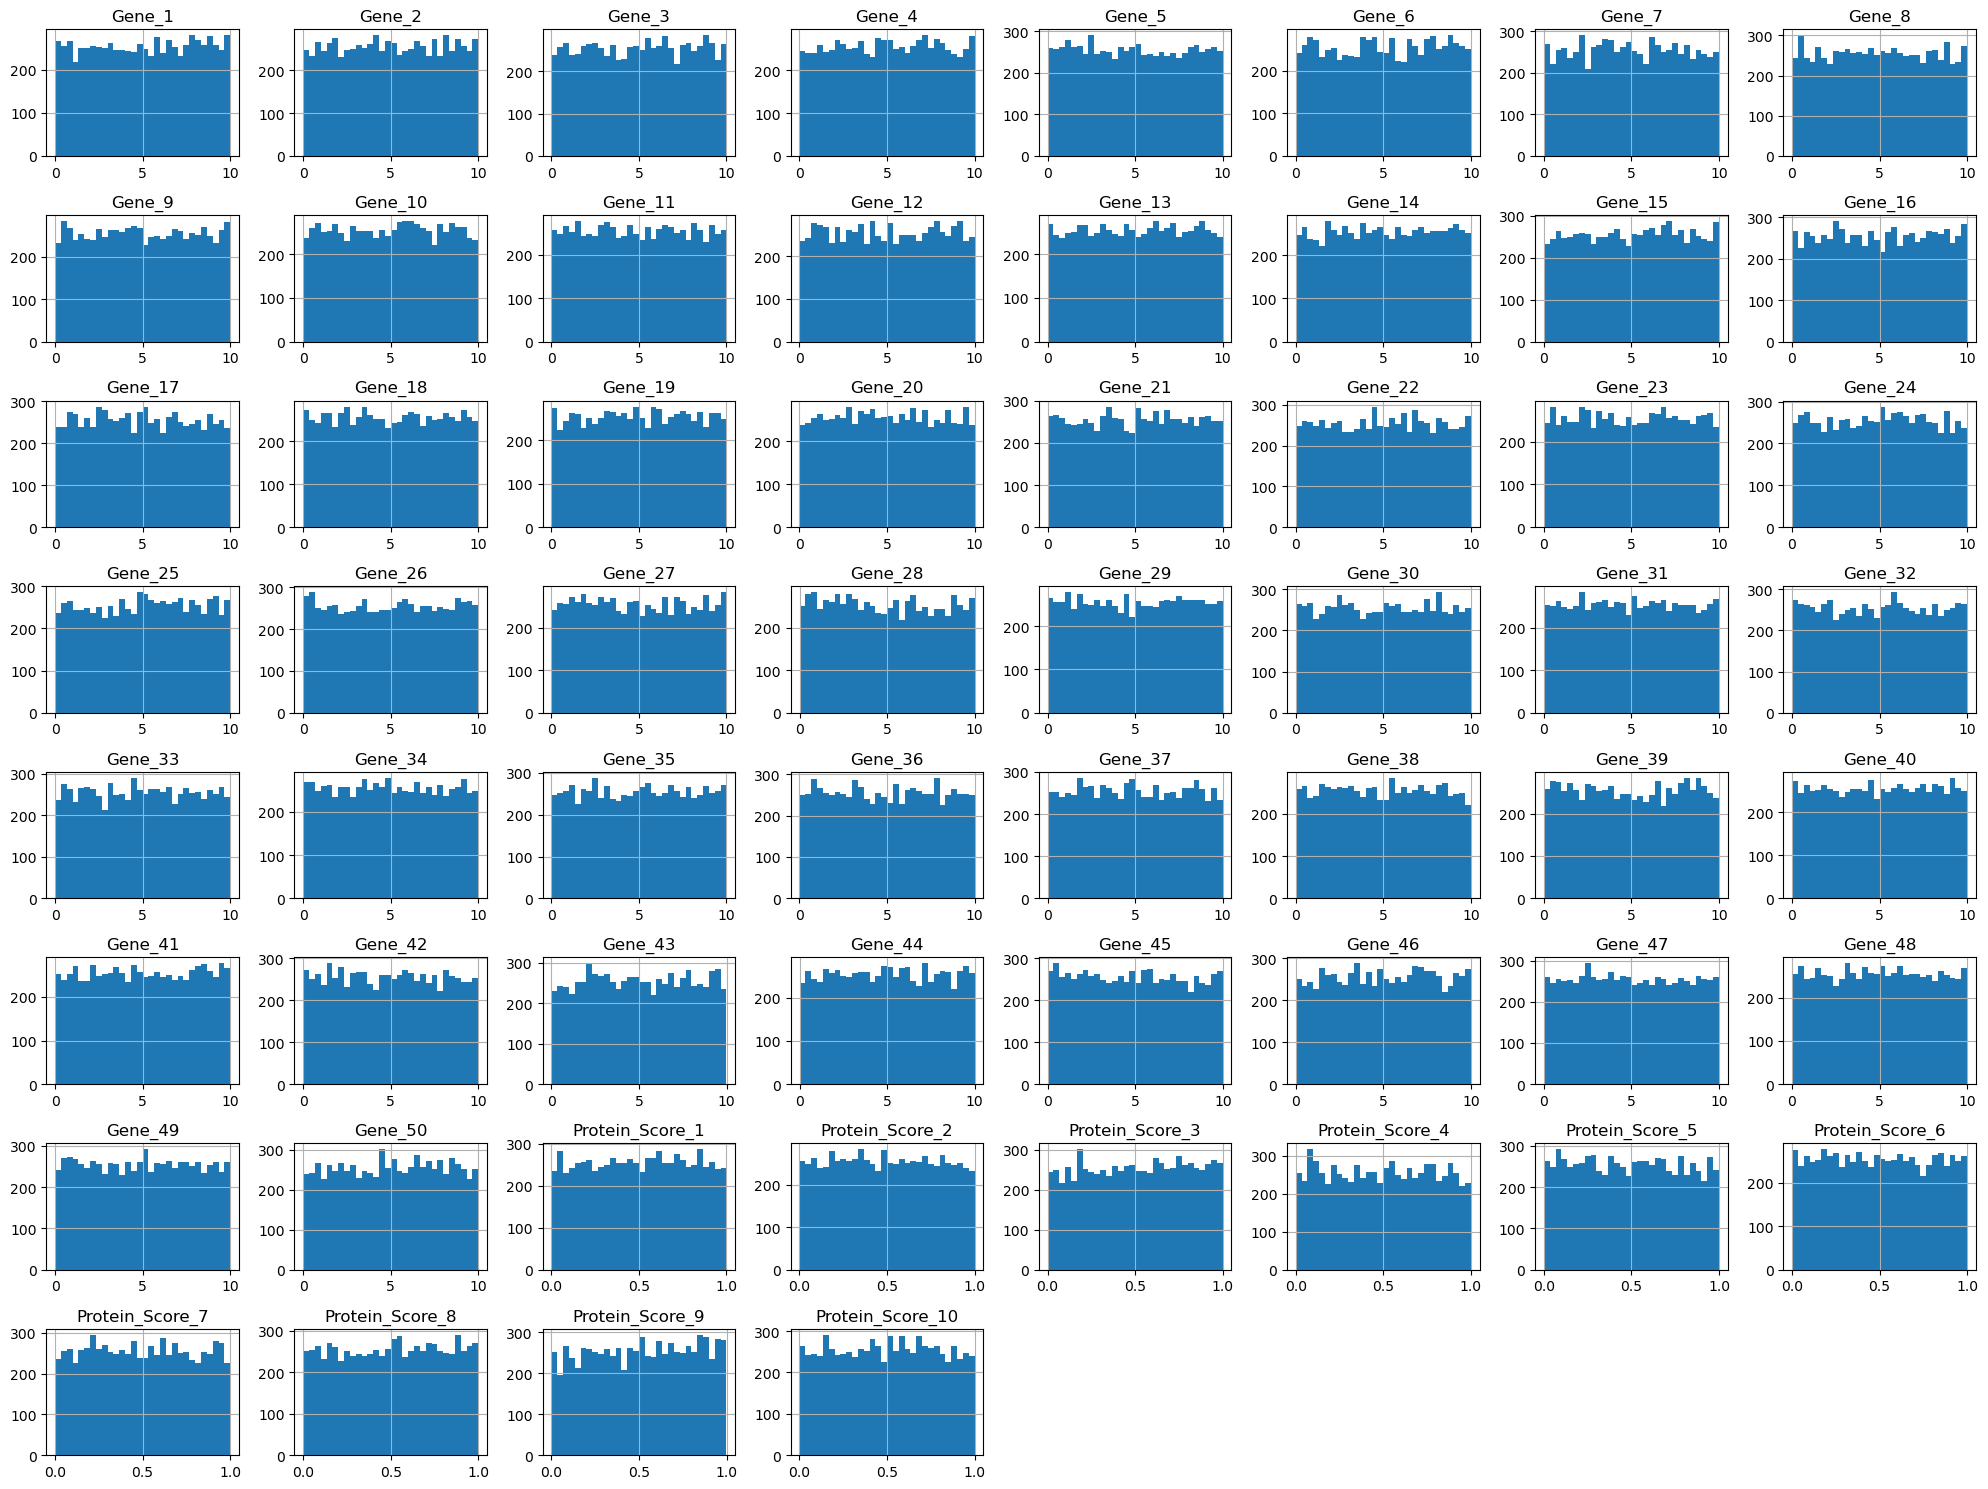

In [67]:
X.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

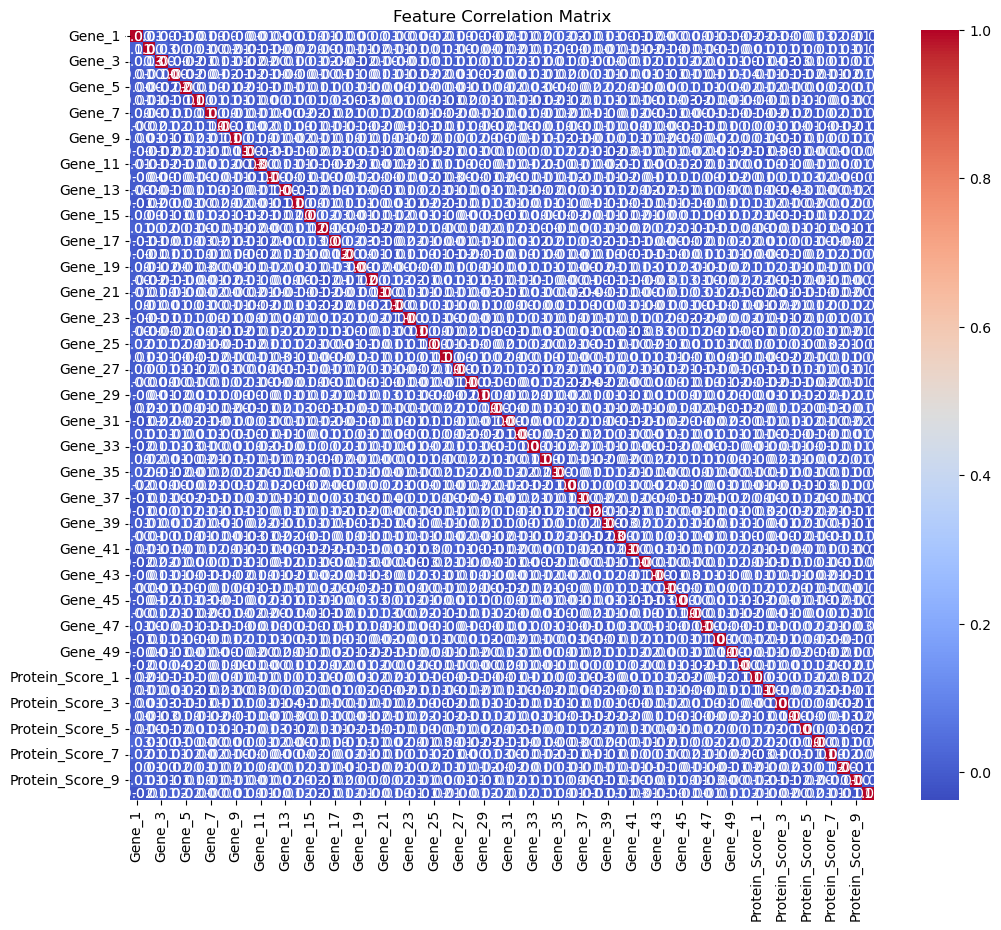

In [61]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

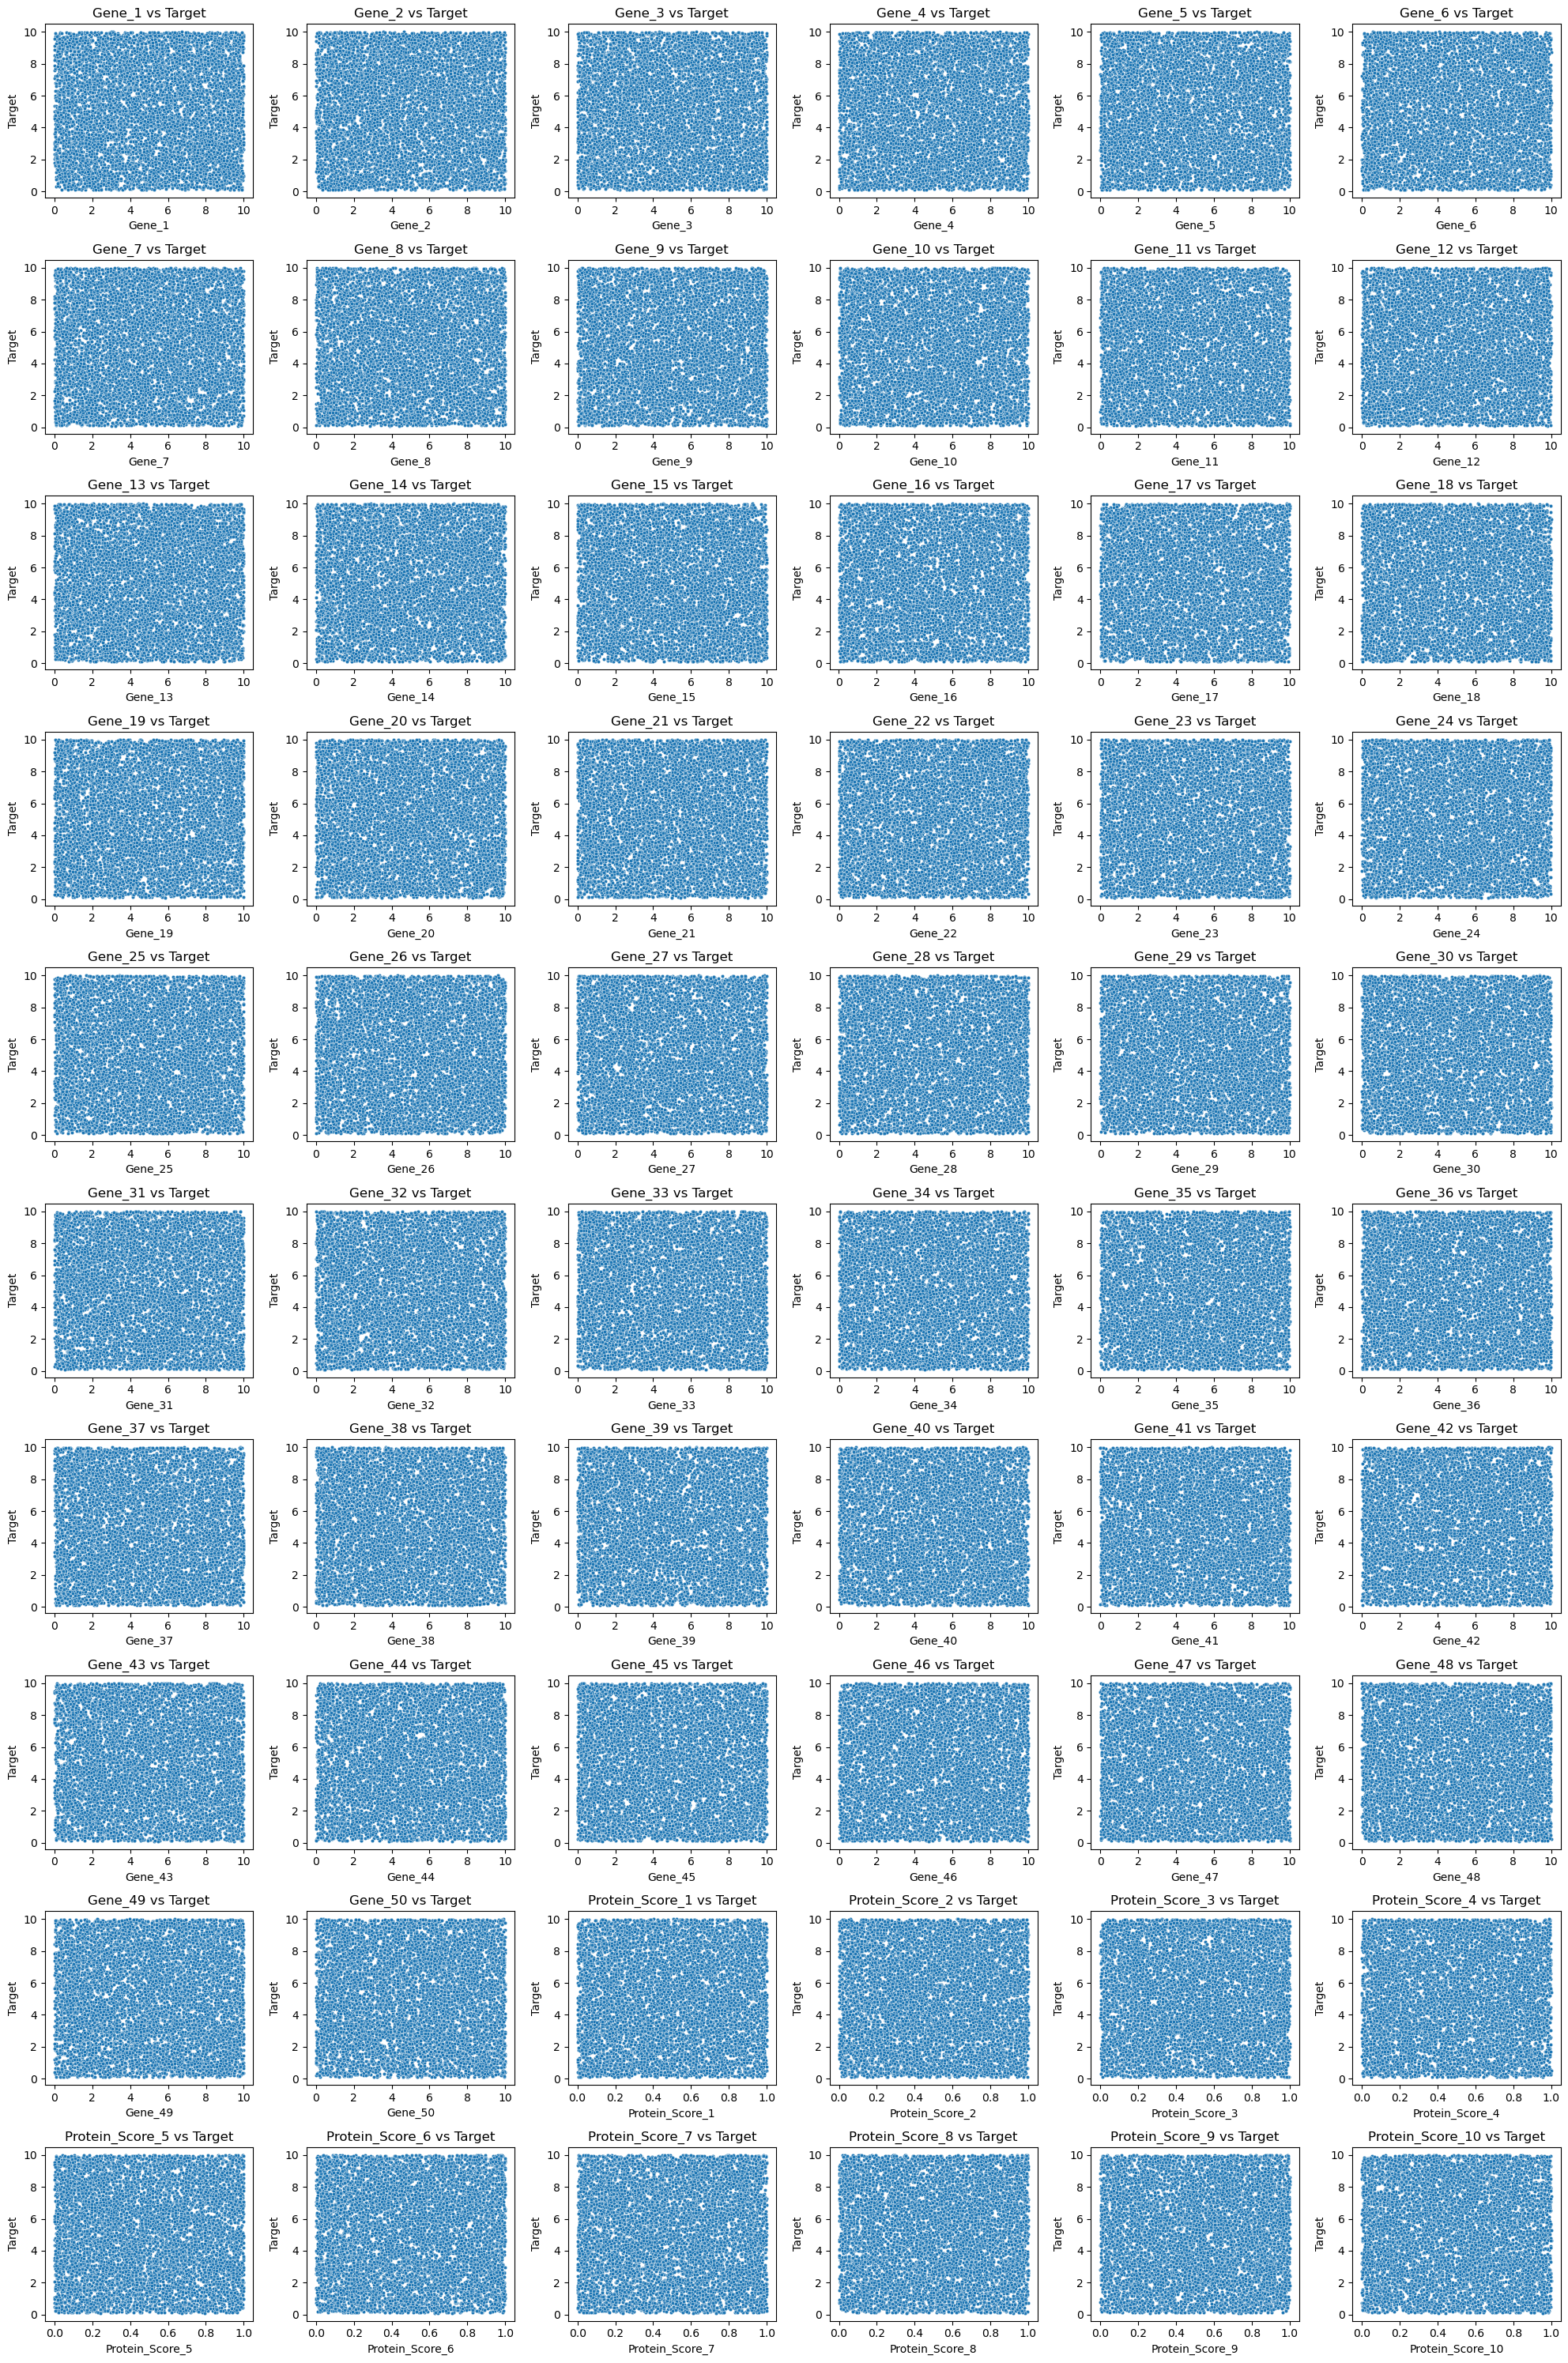

In [68]:
import math 

num_cols = len(X.columns)
cols_per_row = 6  # you can adjust this
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.scatterplot(x=X[col], y=y.squeeze(), ax=axes[i], s=10)
    axes[i].set_title(f"{col} vs Target")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Target")

plt.tight_layout()
plt.show()

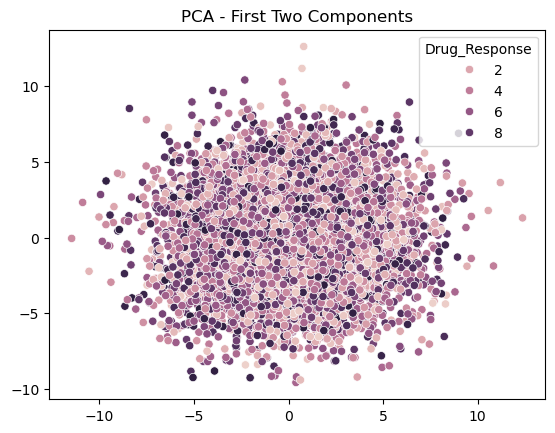

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=y.squeeze())
plt.title("PCA - First Two Components")
plt.show()

### Split dataset (into training and test datasets)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_train, y_test)

(6114, 60) (1529, 60)
(6114, 1) (1529, 1)
      Drug_Response
1513       2.766439
216        7.515620
5879       1.932012
5169       7.598669
421        3.422897
...             ...
5226       9.616054
5390       2.868097
860        5.686358
7603       4.605737
7270       0.621705

[6114 rows x 1 columns]       Drug_Response
7503       8.193560
7478       4.443237
2462       8.884893
4507       5.561547
2973       4.191243
...             ...
2543       7.065646
5993       5.653575
1192       3.844660
5440       4.231082
7358       0.341941

[1529 rows x 1 columns]


In [10]:
# normalize
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train_scaled.shape, y_test_scaled.shape)
print(X_train_scaled, X_test_scaled)
print(y_train_scaled, y_test_scaled)

(6114, 60) (1529, 60)
(6114, 1) (1529, 1)
[[ 0.56879517 -1.56388397 -1.7019184  ...  0.32763683  0.04465087
   1.32992607]
 [-0.53188745  1.17166714 -1.48829558 ...  0.35166946  0.25300954
   0.47485727]
 [ 0.56199131 -0.62778715  0.76372286 ... -1.66772369  0.57318251
  -0.89916241]
 ...
 [-1.61209212 -1.12678151 -0.85296182 ...  0.82303442  0.92782776
  -1.13739282]
 [-0.53645006 -1.10138559  0.10370227 ...  1.54847028 -0.65115789
  -0.52890813]
 [ 1.20423286 -0.74061804 -0.66638248 ...  1.61513865  1.07973269
   0.59417188]] [[-1.66993651  1.71129047 -0.60451282 ... -1.18974489  1.38046183
  -0.53566399]
 [-1.69694034  1.66771262 -0.75515025 ...  0.06228514  1.49036265
   0.08650139]
 [-0.90100086 -0.65553432  0.56440323 ...  1.63865834  1.01457721
   0.03062169]
 ...
 [-0.83034468  1.7304298  -1.03017734 ...  0.09434593  1.24140523
  -0.27067501]
 [-0.48199996  1.03531216 -0.38769618 ...  0.39833509 -0.82409458
  -1.08902361]
 [-0.19677675 -1.4629598  -0.97563839 ...  0.0987338  -1

In [11]:
# Save the data splits to a pickle file

import pickle

with open("rianna_data_splits.pkl", "wb") as f:
    pickle.dump((X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled), f)